In [15]:
import matplotlib.pylab as plt
import numpy as np
from numpy.random import multivariate_normal as mvn
%matplotlib inline

# Übung 3

In dieser Woche gibt es 3 Implementierungsaufgaben. Für die volle Punktzahl reichen 2 der 3 Aufgaben, welche 
Sie frei wählen können! Für die Bearbeitung einer 3. Aufgabe, können Sie bis zu 2,5 Bonuspunkte erhalten.

### 1. Min-Max-Scaler (50%)

$\Large x \leftarrow \frac{x - \text{min}_x}{\text{max}_x - \text{min}_x} $

In [16]:
class MinMaxScaler:
    """
    Attributes:
        min (numpy.ndarray): vector of the minimum values for each feature
        max (numpy.ndarray): vector of the maximum values for each feature
    """
    def __init__(self):
        self.min = None
        self.max = None
    
    def fit(self, X):
        """
        calculate the minimum and maximum value for each feature and store in `self.min` and `self.max`
        
        Args:
            X (numpy.ndarray): 2D feature matrix (columns->features, rows->samples)
        """
        self.min = X.min(axis=0)
        self.max = X.max(axis=0)
        return None
    
    def transform(self, X):
        """
        Apply min-max scaling and return scaled data
        
        Args:
            X (numpy.ndarray): 2D feature matrix (columns->features, rows->samples)
        
        Returns:
            numpy.ndarray: 2D feature matrix of scaled features (columns->features, rows->samples)
        """
        if self.min is None or self.max is None:
            raise ValueError("scaler is not fitted yet. please call self.fit() first!")
        X_norm = (X - self.min) / (self.max - self.min)
        return X_norm
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


#### Überprüfung

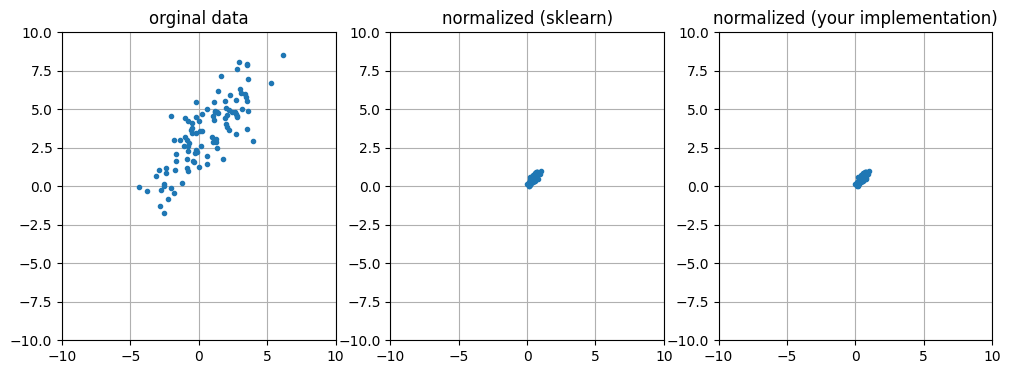

In [17]:
from sklearn.preprocessing import MinMaxScaler as MinMaxScaler_

# generate some toy data
mu = np.array([0, 3])
C = np.array([[5.,4.], [4.,5.]])
X = mvn(mu, C, 100)

# plot the data
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
ax1.plot(X[:,0], X[:,1], '.')
X_norm1 = MinMaxScaler_().fit_transform(X)
ax2.plot(X_norm1[:,0], X_norm1[:,1], '.')

lim = [-10, 10]
for ax in (ax1, ax2, ax3):
    ax.grid()
    ax.set_xlim(lim)
    ax.set_ylim(lim)

ax1.set_title('orginal data')
ax2.set_title('normalized (sklearn)')
ax3.set_title('normalized (your implementation)')

X_norm2 = MinMaxScaler().fit_transform(X)
ax3.plot(X_norm2[:,0], X_norm2[:,1], '.')

### 2. One Hot Encoding (50%)

In [18]:
class OneHotEncoder:
    """
    Attributes:
        categories (list of numpy.ndarray): list of vectors of unique categories per feature
    """
    def __init__(self):
        self.categories = None
        
    def fit(self, X):
        """
        determine the unique categories per feature and store in `self.categories`
        
        Args:
            X (numpy.ndarray): 2D feature matrix (columns->features, rows->samples)
        """
        self.categories = []
        for col in X.T:
            self.categories.append(np.unique(col))
        return None
    
    def transform(self, X):
        """
        transform categorical features to one-hot-encoded features
        
        Args:
            X (numpy.ndarray): 2D feature matrix (columns->features, rows->samples)
        
        Returns:
            numpy.ndarray: 2D feature matrix of one hot encoded features with a column for each category 
                for each feature
        """
        if self.categories is None:
            raise ValueError("transformer is not fitted yet. please call self.fit() first!")
        feature_list = []
        for idx, col in enumerate(X.T):
            feature_list.append(
                (col == self.categories[idx][:, np.newaxis]).T.astype(float)
            )
        return np.concatenate(feature_list, axis=1)
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


#### Überprüfung

In [19]:
from sklearn.preprocessing import OneHotEncoder as OneHotEncoder_

# create some categorical toy data
cat_data = np.array([['blue', 'yellow', 'blue', 'green', 'red', 'yellow'],
                     ['warm', 'medium', 'cold', 'cold', 'warm', 'warm']]).T

print('sklearn:\n', OneHotEncoder_(sparse=False).fit_transform(cat_data), '\n')
print('your implementation: \n', OneHotEncoder().fit_transform(cat_data))

sklearn:
 [[1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 1.]] 

your implementation: 
 [[1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 1.]]


### 3. Bag-of-Words Features (50%)

In [20]:
import itertools

class CountVectorizer:
    """
    Attributes:
        vocabulary (list of str): list of tokens (words)
    """
    def __init__(self, vocabulary=None):
        self.vocabulary = vocabulary
    
    @staticmethod
    def preprocess(s):
        return "".join([c for c in s.lower() if c.isalnum() or c == " "]).split(" ")
        
    def fit(self, X):
        """
        Learn the vocabulary from the data and store in `self.vocabulary`
        
        Args:
            X (list of str): list of documents
        """
        preprocessed = [self.preprocess(s) for s in X]
        words = itertools.chain(*preprocessed)
        self.vocabulary = sorted(list(set(words)))
        return None
    
    def transform(self, X):
        """
        count the tokens (words) per document and transform to bag of word features
        
        Args:
            X (list of str): list of documents
            
        Returns:
            numpy.ndarray: 2D feature matrix, with a row per document, and a column per word in the vocabulary
        """
        if self.vocabulary is None:
            raise ValueError("transformer is not fitted yet. please call self.fit() first!")
        X_transformed = np.zeros((len(X), len(self.vocabulary)))
        for idx, row in enumerate(X):
            word_list = np.array(self.preprocess(row))
            X_transformed[idx] = (word_list[:, np.newaxis] == self.vocabulary).sum(axis=0)
        return X_transformed.astype(int)
        
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


#### Überprüfung

In [21]:
from sklearn.feature_extraction.text import CountVectorizer as CountVectorizer_

# generate toy data
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?']

# use sklearn
vectorizer = CountVectorizer_()
X = vectorizer.fit_transform(corpus)
print("sklearn:")
print(f"Vocabulary: {vectorizer.get_feature_names_out()}")
print("transformed features:\n", X.toarray(), '\n')

# use your implementation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print("your implementation:")
print(f"Vocabulary: {vectorizer.vocabulary}")
print("transformed features:\n", X, "\n")

sklearn:
Vocabulary: ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
transformed features:
 [[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]] 

your implementation:
Vocabulary: ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
transformed features:
 [[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]] 

